In [2]:
!pip install fastai
from fastai.vision.all import *
!pip install timm
import timm


In [4]:
url = "Downloads/brain-tumor-dataset"
path =  Path(url)
path.ls()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Downloads\\brain-tumor-dataset'

In [4]:
filepaths = get_image_files(path)
filepaths[5].parent.name

'no'

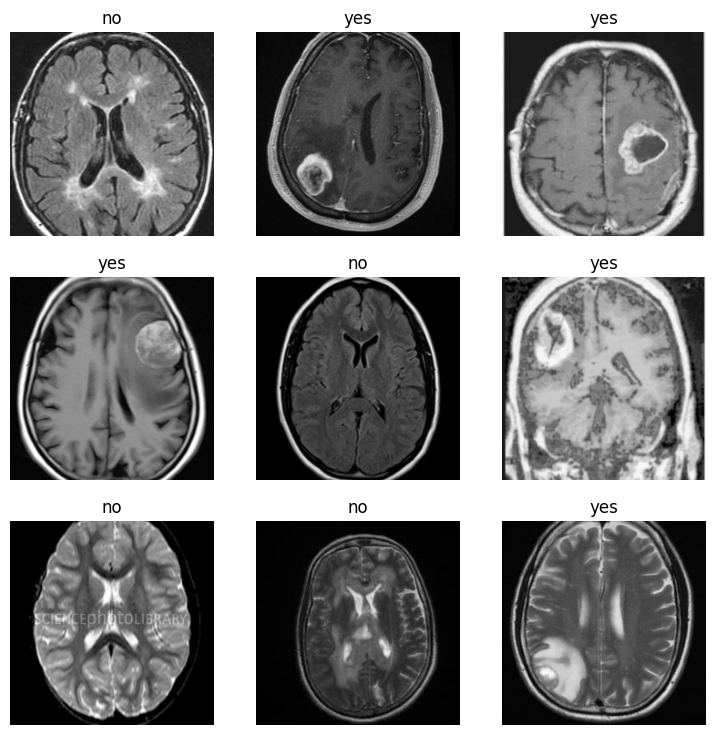

In [5]:
dls = ImageDataLoaders.from_folder(path, valid_pct = 0.2, seed = 42,item_tfms=Resize(224))
dls.show_batch()

SuggestedLRs(valley=0.0004786300996784121)

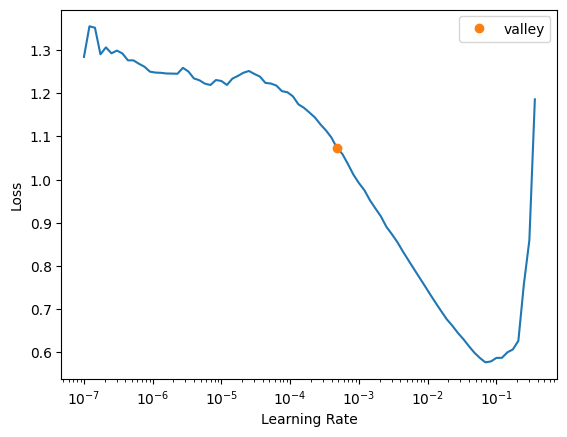

In [19]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.lr_find()

#learn.fit_one_cycle(4)

In [20]:
learn.fine_tune(4, 4e-4)


epoch,train_loss,valid_loss,accuracy,time
0,1.242411,1.025039,0.580000,00:02


epoch,train_loss,valid_loss,accuracy,time
0,1.121838,0.743300,0.620000,00:03
1,1.045321,0.582688,0.740000,00:02
2,0.915007,0.505296,0.740000,00:02
3,0.817824,0.487849,0.740000,00:02


In [21]:
learn.export(fname='tumor-resnet34.pkl')
